Dokładność modelu: 0.89
Macierz pomyłek:
[[20  3  3  0]
 [ 5 22  0  1]
 [ 1  0 29  0]
 [ 0  0  0 36]]


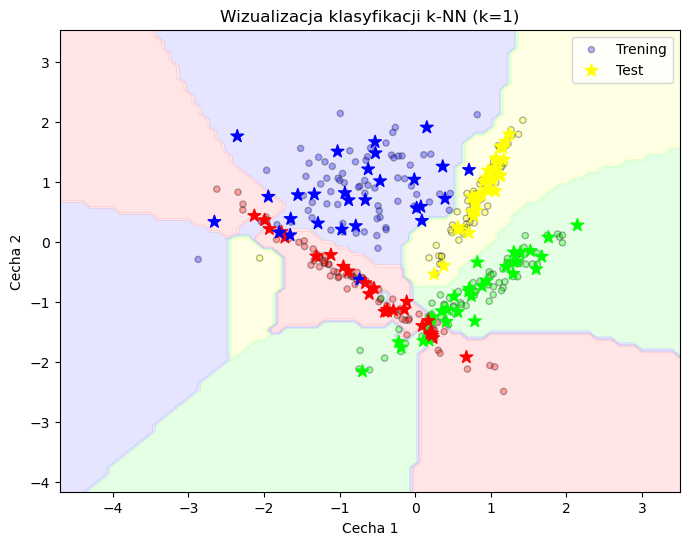

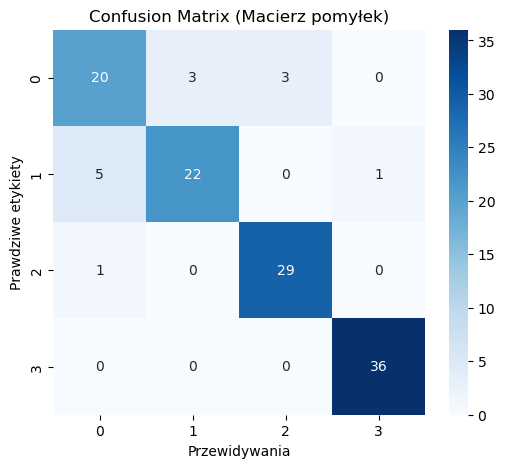

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib.colors import ListedColormap

# Generowanie przykładowych danych
n_classes = 4
n_samples_per_class = 100
# Ustawienie ziarna losowości
seed_value = 13  # Możesz zmienić na dowolny inny numer, aby ustawić własny seed

X, y = datasets.make_classification(n_samples=n_classes*n_samples_per_class, n_features=2, n_informative=2,
                                     n_redundant=0, n_clusters_per_class=1, n_classes=n_classes, random_state=seed_value)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicjalizacja klasyfikatora k-NN
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


# Predykcja na zbiorze testowym
y_pred = knn.predict(X_test)
# Obliczanie dokładności
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy:.2f}')

# Obliczanie macierzy pomyłek
cm = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(cm)

# Tworzenie siatki punktów do wyświetlenia obszarów klasyfikacji
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predykcja na siatce
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wizualizacja wyników klasyfikacji
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFFF00'])

plt.figure(figsize=(8, 6))

# Rysowanie obszarów klasyfikacji
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)

# Rysowanie punktów treningowych z większą przezroczystością
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolors='k', marker='o', s=20, alpha=0.3, label="Trening")
# Rysowanie punktów testowych
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, marker='*', s=90, label="Test")

plt.title(f'Wizualizacja klasyfikacji k-NN (k={k})')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend(loc='best')
plt.show()

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Przewidywania')
plt.ylabel('Prawdziwe etykiety')
plt.title('Confusion Matrix (Macierz pomyłek)')
plt.show()
